In [22]:
import math
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, BasicAer, execute
from qiskit_ibm_provider import IBMProvider
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# qc = quantum circuit, qr = quantum register, cr = classical register, a = 2, 7, 8, 11 or 13
def circuit_amod15(qc,qr,cr,a):
    if a == 2:
        qc.cswap(qr[4],qr[3],qr[2])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[1],qr[0])
    elif a == 7:
        qc.cswap(qr[4],qr[1],qr[0])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[3],qr[2])
        qc.cx(qr[4],qr[3])
        qc.cx(qr[4],qr[2])
        qc.cx(qr[4],qr[1])
        qc.cx(qr[4],qr[0])
    elif a == 8:
        qc.cswap(qr[4],qr[1],qr[0])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[3],qr[2])
    elif a == 11: # this is included for completeness
        qc.cswap(qr[4],qr[2],qr[0])
        qc.cswap(qr[4],qr[3],qr[1])
        qc.cx(qr[4],qr[3])
        qc.cx(qr[4],qr[2])
        qc.cx(qr[4],qr[1])
        qc.cx(qr[4],qr[0])
    elif a == 13:
        qc.cswap(qr[4],qr[3],qr[2])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[1],qr[0])
        qc.cx(qr[4],qr[3])
        qc.cx(qr[4],qr[2])
        qc.cx(qr[4],qr[1])
        qc.cx(qr[4],qr[0])

In [3]:
# qc = quantum circuit, qr = quantum register, cr = classical register, a = 2, 7, 8, 11 or 13
def circuit_aperiod15(qc,qr,cr,a):
    if a == 11:
        circuit_11period15(qc,qr,cr)
        return
    
    # Initialize q[0] to |1> 
    qc.x(qr[0])

    # Apply a**4 mod 15
    qc.h(qr[4])
    #   controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[0])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a**2 mod 15
    qc.h(qr[4])
    #   controlled unitary
    qc.cx(qr[4],qr[2])
    qc.cx(qr[4],qr[0])
    #   feed forward
    qc.p(math.pi/2.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[1])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a mod 15
    qc.h(qr[4])
    #   controlled unitary.
    circuit_amod15(qc,qr,cr,a)
    #   feed forward
    qc.p(3.*math.pi/4.,qr[4]).c_if(cr, 3)
    qc.p(math.pi/2.,qr[4]).c_if(cr, 2)
    qc.p(math.pi/4.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[2])


In [4]:
def circuit_11period15(qc,qr,cr):
    # Initialize q[0] to |1> 
    qc.x(qr[0])

    # Apply a**4 mod 15
    qc.h(qr[4])
    #   controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[0])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a**2 mod 15
    qc.h(qr[4])
    #   controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    #   feed forward
    qc.p(math.pi/2.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[1])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply 11 mod 15
    qc.h(qr[4])
    #   controlled unitary.
    qc.cx(qr[4],qr[3])
    qc.cx(qr[4],qr[1])
    #   feed forward
    qc.p(3.*math.pi/4.,qr[4]).c_if(cr, 3)
    qc.p(math.pi/2.,qr[4]).c_if(cr, 2)
    qc.p(math.pi/4.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[2])

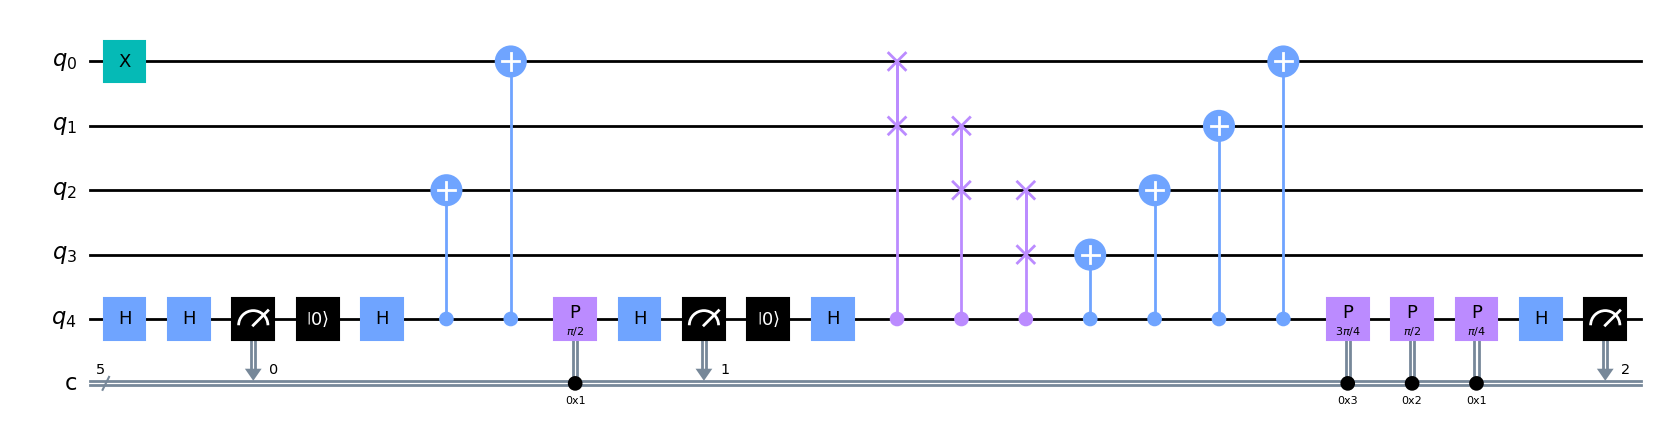

In [5]:
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')

shor = QuantumCircuit(q, c)
circuit_aperiod15(shor,q,c,7)
shor.draw(output='mpl')

In [6]:
hub = "ibm-q"
group = "open"
project = "main"
token = "e5d11b4427eb7cc044e3a47de7a638f30d7fb47427ed1db6cd724ac72f1ceec3c08602e214ea41c82f37ad1e7f48ee2894ae87defa02fc591b178ae8d4a03175"
credentials = {"token": token, "hub": hub, "group": group, "project": project}

IBMProvider.save_account(
    token, overwrite=True, instance=hub + "/" + group + "/" + project
)
provider = IBMProvider()

In [7]:
backends = provider.backends()
for backend in backends:
    print(backend.name)

simulator_stabilizer
ibm_brisbane
ibm_kyoto
ibm_osaka
ibmq_qasm_simulator
simulator_extended_stabilizer
simulator_mps
simulator_statevector


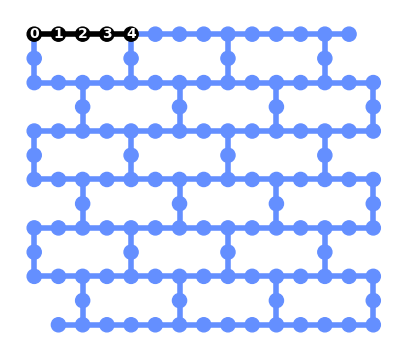

In [11]:
new_circ_lv0 = transpile(shor, backend=backend, optimization_level=0)
plot_circuit_layout(new_circ_lv0, backend)

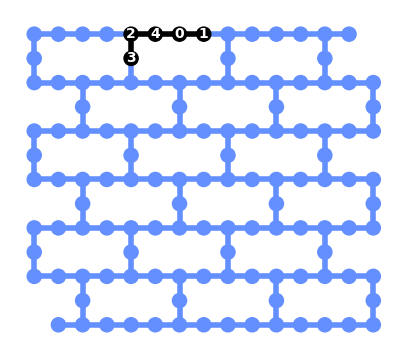

In [12]:
new_circ_lv1 = transpile(shor, backend=backend, optimization_level=1)
plot_circuit_layout(new_circ_lv1, backend)

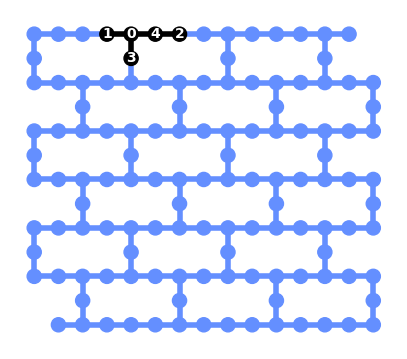

In [13]:
new_circ_lv2 = transpile(shor, backend=backend, optimization_level=2)
plot_circuit_layout(new_circ_lv2, backend)

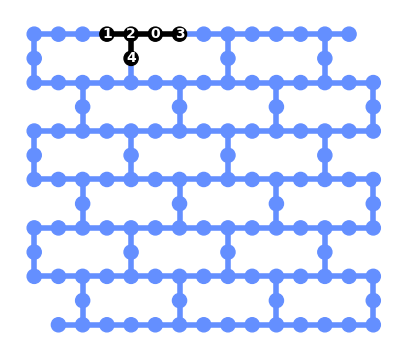

In [10]:
from qiskit.visualization import plot_circuit_layout


new_circ_lv3 = transpile(shor, backend=backend, optimization_level=3)
plot_circuit_layout(new_circ_lv3, backend)

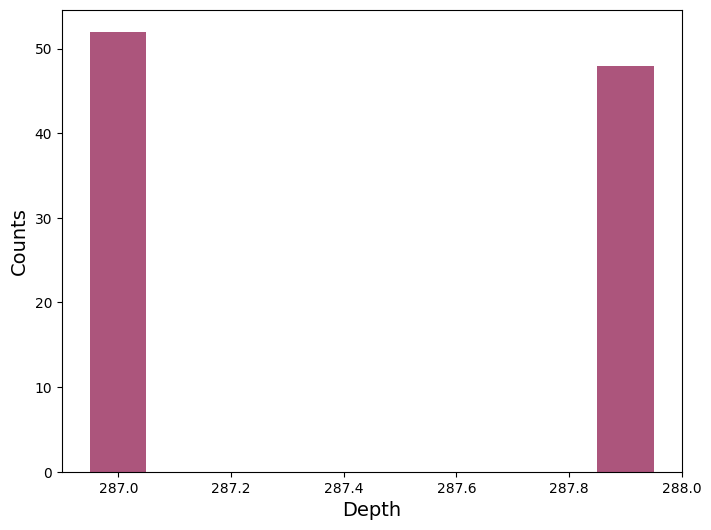

In [14]:
depths = []
for _ in range(100):
    depths.append(
        transpile(
            shor,
            backend,
            layout_method='trivial'  # Mise en page fixe mappée dans l'ordre du circuit
        ).depth()
    )

plt.figure(figsize=(8, 6))
plt.hist(depths, align='left', color='#AC557C')
plt.xlabel('Depth', fontsize=14)
plt.ylabel('Counts', fontsize=14);

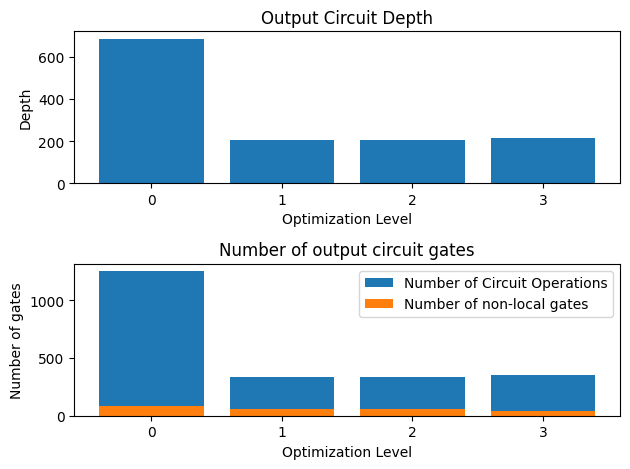

In [21]:
depths = []
gate_counts = []
non_local_gate_counts = []
levels = [str(x) for x in range(4)]
for level in range(4):
     circ = transpile(hor, backend, optimization_level=level)
     depths.append(circ.depth())
     gate_counts.append(sum(circ.count_ops().values()))
     non_local_gate_counts.append(circ.num_nonlocal_gates())
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.bar(levels, depths, label='Depth')
ax1.set_xlabel("Optimization Level")
ax1.set_ylabel("Depth")
ax1.set_title("Output Circuit Depth")
ax2.bar(levels, gate_counts, label='Number of Circuit Operations')
ax2.bar(levels, non_local_gate_counts, label='Number of non-local gates')
ax2.set_xlabel("Optimization Level")
ax2.set_ylabel("Number of gates")
ax2.legend()
ax2.set_title("Number of output circuit gates")
fig.tight_layout()
plt.show()

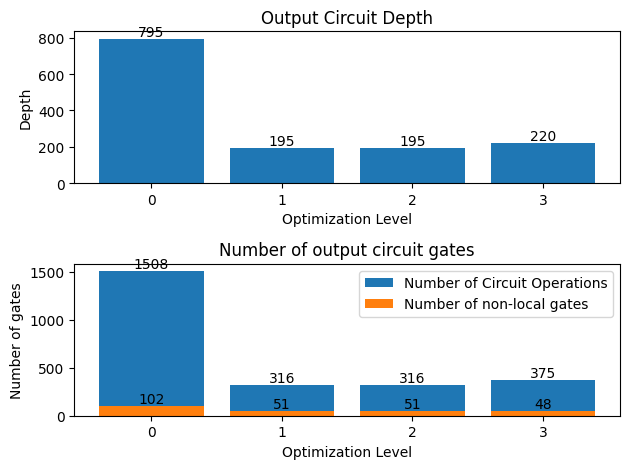

In [15]:
depths = []
gate_counts = []
non_local_gate_counts = []
levels = [str(x) for x in range(4)]

for level in range(4):
    circ = transpile(shor, backend, optimization_level=level)
    depths.append(circ.depth())
    gate_counts.append(sum(circ.count_ops().values()))
    non_local_gate_counts.append(circ.num_nonlocal_gates())

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.bar(levels, depths, label='Depth')
ax1.set_xlabel("Optimization Level")
ax1.set_ylabel("Depth")
ax1.set_title("Output Circuit Depth")

ax2.bar(levels, gate_counts, label='Number of Circuit Operations')
ax2.bar(levels, non_local_gate_counts, label='Number of non-local gates')
ax2.set_xlabel("Optimization Level")
ax2.set_ylabel("Number of gates")
ax2.legend()
ax2.set_title("Number of output circuit gates")

# Ajouter les valeurs exactes au-dessus des barres
for i, value in enumerate(depths):
    ax1.text(levels[i], value + 0.1, str(value), ha='center', va='bottom')

for i, value in enumerate(gate_counts):
    ax2.text(levels[i], value + 0.1, str(value), ha='center', va='bottom')
    
for i, value in enumerate(non_local_gate_counts):
    ax2.text(levels[i], value + 0.1, str(value), ha='center', va='bottom')

fig.tight_layout()
plt.show()